In [2]:
# === Essential Libraries for Data Analysis and Machine Learning === #
import pandas as pd  # Powerful library for data manipulation and analysis
import numpy as np  # Foundation for numerical computations
# === Visualization Tools === #
import matplotlib.pyplot as plt  # For static and interactive plotting
import seaborn as sns  # For aesthetically pleasing statistical visualizations
# === Machine Learning Preprocessing and Metrics === #
from sklearn.preprocessing import RobustScaler  # Robust scaling to handle outliers
from sklearn.metrics import silhouette_score  # Evaluate clustering performance
# === Machine Learning Models === #
from sklearn.linear_model import LinearRegression  # Build simple regression models
from sklearn.cluster import KMeans  # Perform K-Means clustering
# === General Settings === #
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner outputs

In [40]:
data = pd.read_csv('Cost_of_Living_and_Income_Extended.csv') # Load the dataset

In [42]:
data.head()  # Displays the first 5 rows of the dataset

,Country,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
0,Australia,2013,3483.92,1106.07,32.09,27.50,1.74,18.23,6.94,17.19,Oceania
1,India,2019,7771.03,5422.78,25.21,29.30,3.35,17.21,12.42,9.90,Asia
2,Russia,2004,6991.30,3972.36,40.85,22.94,15.48,15.28,7.10,9.59,Europe
3,South Africa,2011,6628.04,6755.75,30.38,15.69,8.03,6.66,11.76,11.04,Africa
4,Brazil,2015,2434.27,2656.36,49.27,12.44,25.06,9.34,3.63,15.09,South America


In [44]:
data.info()  # Provides a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         500 non-null    object 
 1   Year                            500 non-null    int64  
 2   Average_Monthly_Income          500 non-null    float64
 3   Cost_of_Living                  500 non-null    float64
 4   Housing_Cost_Percentage         500 non-null    float64
 5   Tax_Rate                        500 non-null    float64
 6   Savings_Percentage              500 non-null    float64
 7   Healthcare_Cost_Percentage      500 non-null    float64
 8   Education_Cost_Percentage       500 non-null    float64
 9   Transportation_Cost_Percentage  500 non-null    float64
 10  Region                          500 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.1+ KB


In [50]:
numeric_columns = data.select_dtypes(include=['number'])  # Filters columns with numeric data types

In [52]:
# Calculating Statistical Moments
# These statistics provide valuable insights into the distribution and characteristics of the data.
stats_moments = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Standard Deviation': numeric_columns.std(),
    'Skewness': numeric_columns.skew(),
    'Kurtosis': numeric_columns.kurt()})
stats_moments

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Year,2011.51400,2012.000,7.018284,-0.024070,-1.244538
Average_Monthly_Income,4291.24824,4391.585,2179.217333,-0.021477,-1.253908
Cost_of_Living,3716.23212,3803.205,1922.160530,-0.030380,-1.199556
Housing_Cost_Percentage,34.97370,35.170,8.657032,-0.028383,-1.208949
Tax_Rate,22.40090,22.275,10.025412,-0.023007,-1.147950
Savings_Percentage,14.92708,14.950,8.813210,0.001500,-1.204539
Healthcare_Cost_Percentage,12.38182,12.365,4.269823,0.015774,-1.219773
Education_Cost_Percentage,8.40844,8.245,3.775455,0.023647,-1.195337
Transportation_Cost_Percentage,12.47594,12.665,4.219147,-0.016875,-1.164251


In [58]:
def plot_corr_heatmap(df):
    """
    GeneratesGenerates a correlation heatmap for dataset. displaying triangle of correlations.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    
    # Mask the half of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create the heatmap with the mask applied
    plt.figure(figsize=(10, 8), dpi=150)
    sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", cbar=True, vmin=-1, vmax=1)
    plt.title('Half Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.show()

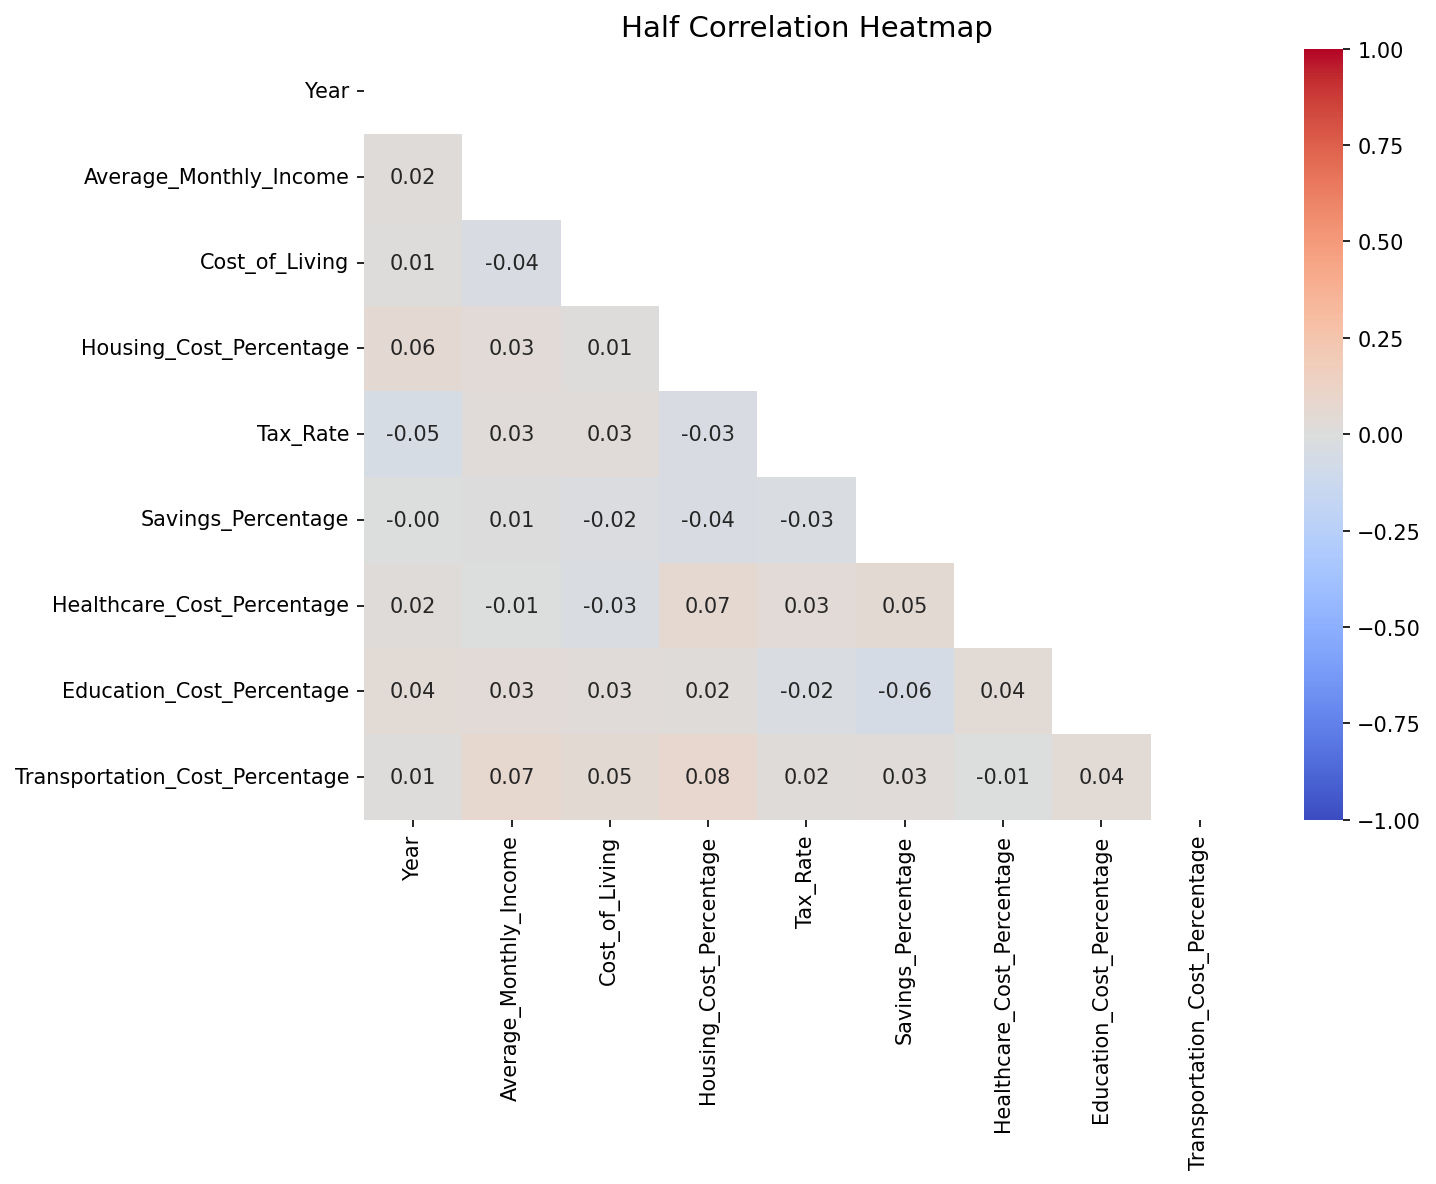

In [60]:
plot_corr_heatmap(numeric_columns)

In [94]:
def plot_bar_chart(dataframe, x_column, y_column, title, x_label, y_label, palette="viridis", legend_label=None):
    """
    Plots a bar chart.
    :param dataframe: Pandas DataFrame containing the data
    :param x_column: Column name for the x-axis (categorical)
    :param y_column: Column name for the y-axis (numerical)
    :param title: Title of the chart
    :param x_label: Label for the x-axis
    :param y_label: Label for the y-axis
    :param palette: Seaborn color palette or list of colors for the bars
    :param legend_label: Label for the legend (optional)
    """
    plt.figure(figsize=(10, 6))
    
    # Create a barplot
    sns.barplot(
        data=dataframe,
        x=x_column,
        y=y_column,
        palette=palette,
    )

    # Add legend if specified
    if legend_label:
        plt.legend([legend_label], loc="best", fontsize=10)
    
    # Chart formatting
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

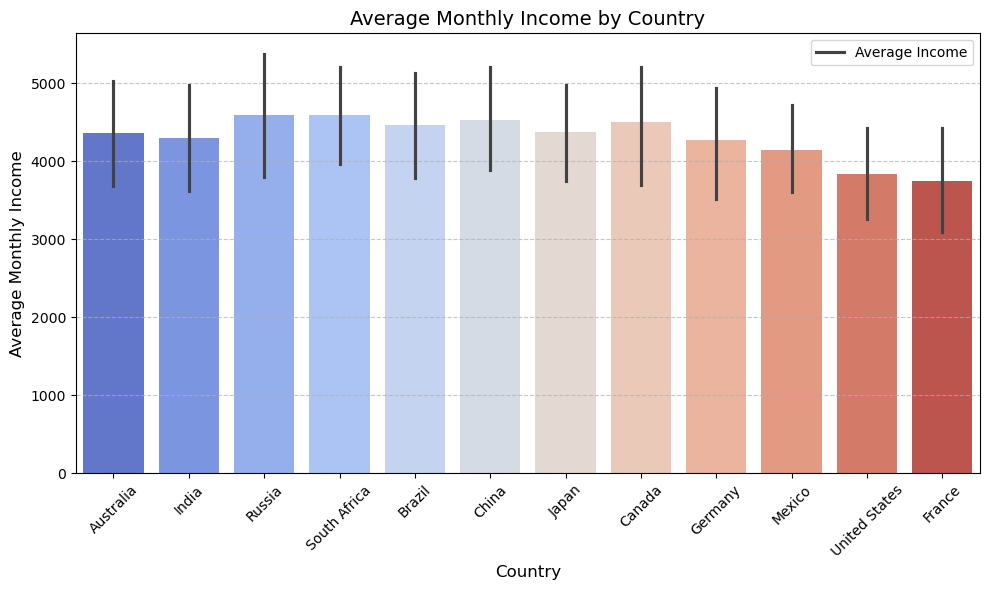

In [100]:
plot_bar_chart_sns(dataframe=data,x_column="Country",y_column="Average_Monthly_Income",title="Average Monthly Income by Country",
    x_label="Country",
    y_label="Average Monthly Income",
    palette="coolwarm",
    legend_label="Average Income",
)

In [102]:
def simple_linear_fit_with_predictions(df, independent_var, dependent_var, new_data=None):
    """
    Fits a simple linear regression model, plots the regression line with confidence intervals, 
    and optionally predicts values for new data points.
    Parameters:
    - df : DataFrame : The dataset containing the data.
    - independent_var : str : The name of the independent variable.
    - dependent_var : str : The name of the dependent variable.
    - new_data : array-like, optional : New data points to predict. Default is None.
    Returns:
    - model : LinearRegression : The trained linear regression model.
    - predictions : array-like : Predictions for new data points.
    """
    # Extract data for independent and dependent variables
    X = df[independent_var].values.reshape(-1, 1)  # Reshape to 2D for modeling
    y = df[dependent_var].values  # Dependent variable (target)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Generate predictions for the original data
    y_pred = model.predict(X)

    #  Predict values for new data points, if provided
    predictions = None
    if new_data is not None:
        new_data = np.array(new_data).reshape(-1, 1)
        predictions = model.predict(new_data)
        print("\nPredictions for new data points:")
        for i, pred in enumerate(predictions):
            print(f"  {independent_var} = {new_data[i][0]:.2f} -> Predicted {dependent_var} = {pred:.2f}")

    #  Plot the regression line and data points
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=X.flatten(),
        y=y,
        ci=95,
        scatter_kws={'color': 'dodgerblue', 's': 60, 'alpha': 0.8, 'label': 'Data Points'},
        line_kws={'color': 'darkred', 'linewidth': 2, 'label': 'Regression Line'}
    )

    # Title and labels
    plt.title(f'Linear Regression: {dependent_var} vs {independent_var}', fontsize=16, weight='bold')
    plt.xlabel(independent_var, fontsize=14, labelpad=10)
    plt.ylabel(dependent_var, fontsize=14, labelpad=10)

    # Add legend
    plt.legend(loc='best', fontsize=12)

    # Customize grid and layout
    plt.grid(True, which='major', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Show the plot
    plt.show()

    return model, predictions


Predictions for new data points:
  Average_Monthly_Income = 40.00 -> Predicted Tax_Rate = 21.83
  Average_Monthly_Income = 45.00 -> Predicted Tax_Rate = 21.83
  Average_Monthly_Income = 30.00 -> Predicted Tax_Rate = 21.83


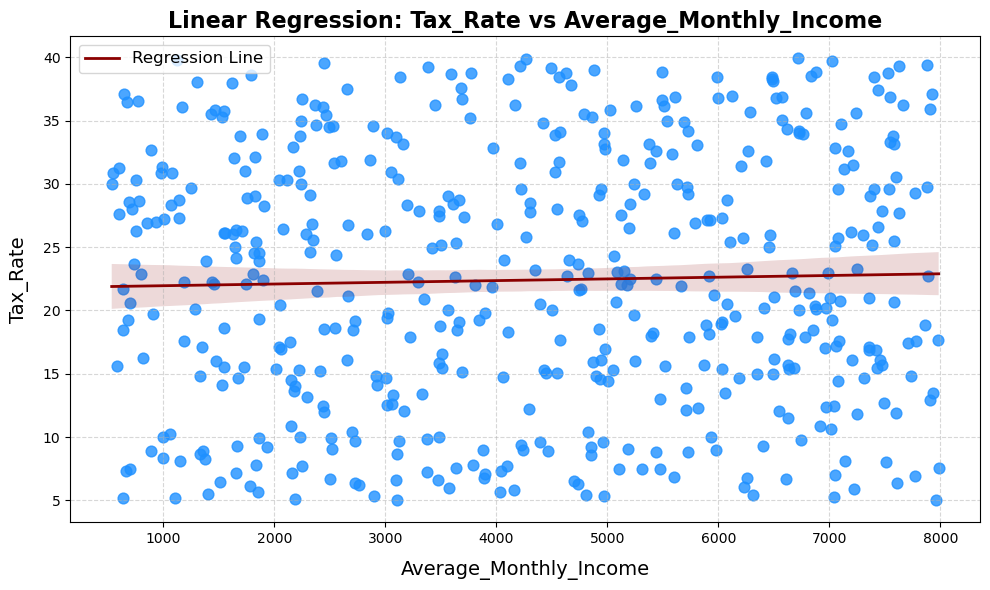

In [112]:
new_data = [40,45,30]  # New x-values for prediction
model, new_y_pred = simple_linear_fit_with_predictions(data,'Average_Monthly_Income','Tax_Rate', new_data)

In [118]:
data_for_clustering = data[['Tax_Rate','Average_Monthly_Income']].copy()

scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [120]:
def compute_silhouette_and_inertia(cluster_count, data):
    """ 
    Calculates silhouette score and inertia for a given number of clusters.
    """
    kmeans_model = KMeans(n_clusters=cluster_count, n_init=20)
    kmeans_model.fit(data)  # Fit the model to the data
    labels = kmeans_model.labels_
    
    # Calculate silhouette score and inertia
    silhouette = silhouette_score(data, labels)
    inertia = kmeans_model.inertia_

    return silhouette, inertia

# Compute WCSS and silhouette scores
wcss_values = []
optimal_cluster_count, best_silhouette_score = None, -np.inf

# Loop through possible cluster counts and calculate silhouette score and inertia
for clusters in range(2, 11):  # Test from 2 to 10 clusters
    silhouette, inertia = compute_silhouette_and_inertia(clusters, scaled_data)
    wcss_values.append(inertia)
    
    # Update the best silhouette score and optimal cluster count
    if silhouette > best_silhouette_score:
        optimal_cluster_count = clusters
        best_silhouette_score = silhouette
        
    print(f"{clusters} clusters silhouette score = {silhouette:.2f}")

print(f"Optimal number of clusters = {optimal_cluster_count}")

2 clusters silhouette score = 0.37
3 clusters silhouette score = 0.38
4 clusters silhouette score = 0.42
5 clusters silhouette score = 0.39
6 clusters silhouette score = 0.35
7 clusters silhouette score = 0.39
8 clusters silhouette score = 0.38
9 clusters silhouette score = 0.37
10 clusters silhouette score = 0.38
Optimal number of clusters = 4


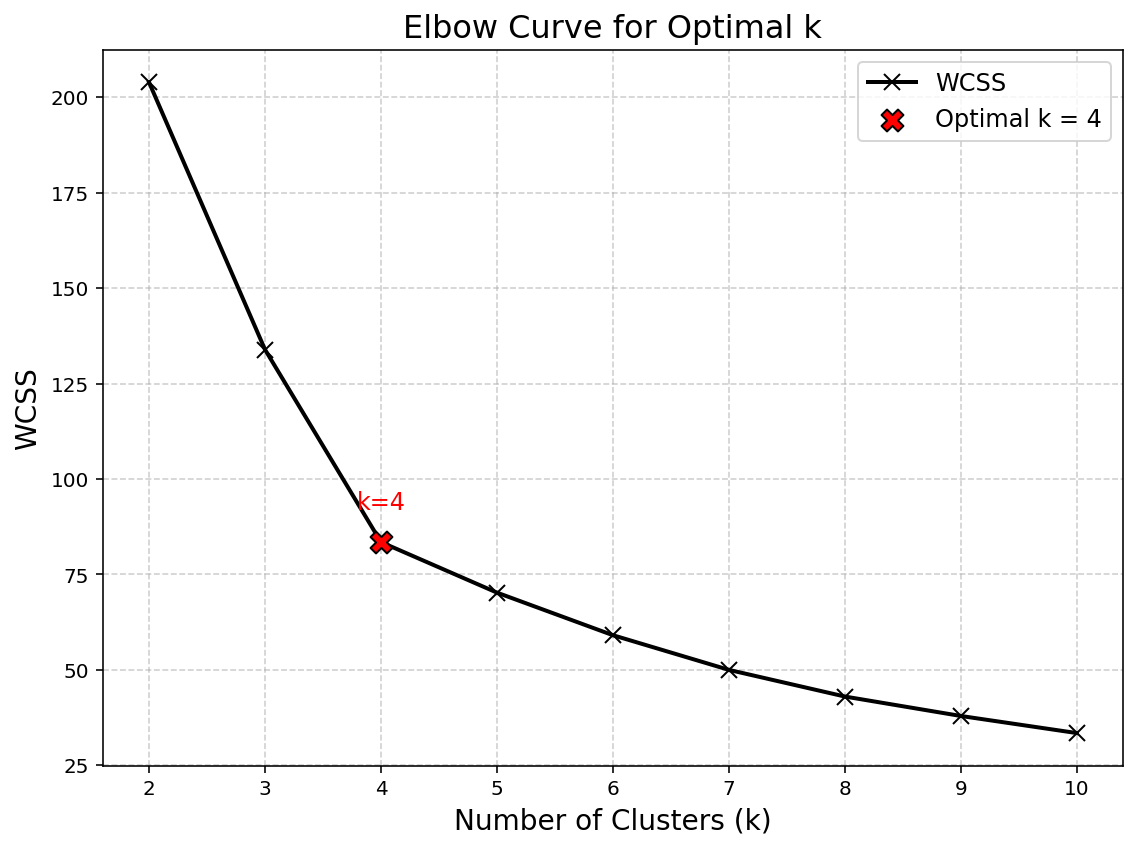

In [134]:
def plot_elbow_curve(min_clusters, max_clusters, wcss_values, optimal_clusters):
    """
    Plots the elbow curve to determine the best number of clusters (k).
    """
    fig, ax = plt.subplots(figsize=(8, 6), dpi=144)
    
    # Plot WCSS values with blue line and diamond markers
    cluster_range = range(min_clusters, max_clusters + 1)
    ax.plot(cluster_range, wcss_values, marker='x', color='black', label='WCSS', markersize=8, linewidth=2)
    
    # Mark the optimal number of clusters
    ax.scatter(optimal_clusters, wcss_values[optimal_clusters - min_clusters], color='red', edgecolor='black', s=120, zorder=5, marker='X', label=f'Optimal k = {optimal_clusters}')
    ax.annotate(
        f'k={optimal_clusters}',
        xy=(optimal_clusters, wcss_values[optimal_clusters - min_clusters]),
        xytext=(optimal_clusters, wcss_values[optimal_clusters - min_clusters] + (max(wcss_values) - min(wcss_values)) * 0.05),
        fontsize=12,
        color='red',
        ha='center'
    )
    
    # Customize plot
    ax.set_xlabel('Number of Clusters (k)', fontsize=14)
    ax.set_ylabel('WCSS', fontsize=14)
    ax.set_title('Elbow Curve for Optimal k', fontsize=16)
    ax.set_xticks(cluster_range)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Plot the elbow curve
plot_elbow_curve(2, 10, wcss_values, optimal_cluster_count)

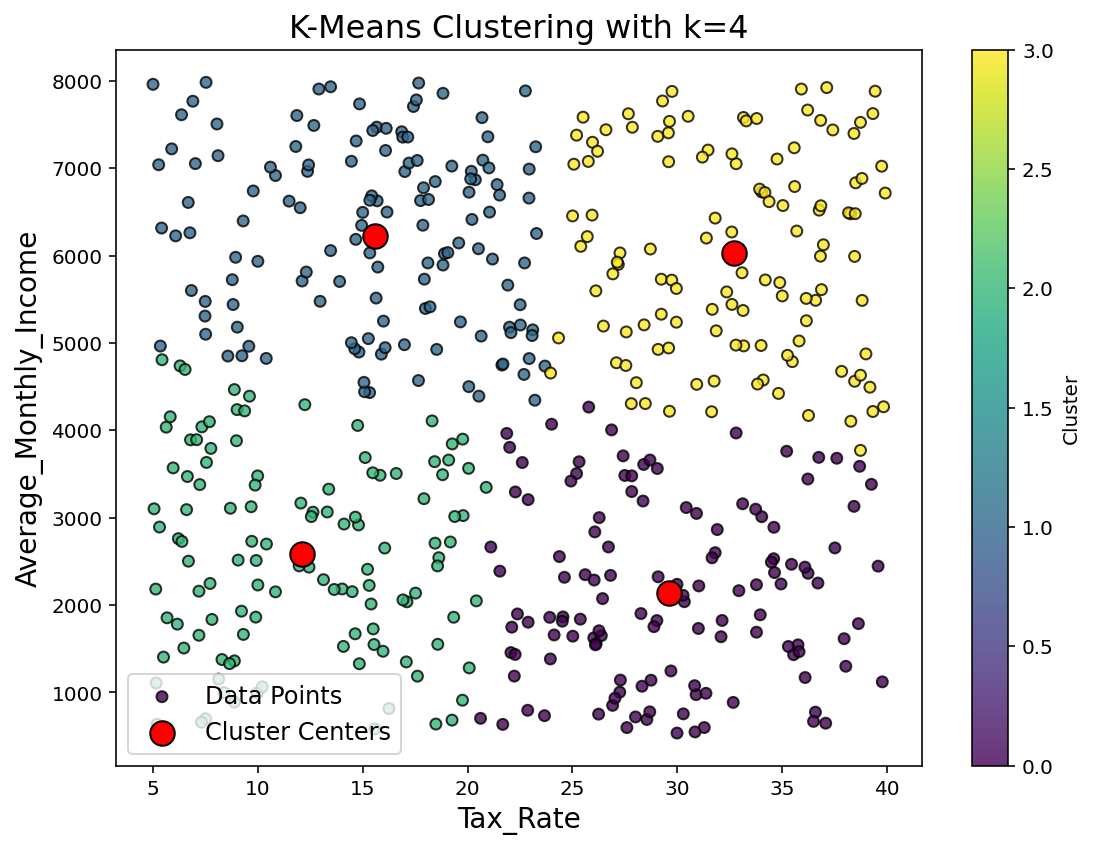

In [140]:
def perform_kmeans_clustering(original_data, normalized_data, scaler, cluster_range):
    """
    Performs K-Means clustering for a given range of k values and visualizes the results.
    Parameters: original_data (ndarray), normalized_data (ndarray), scaler (RobustScaler), cluster_range (iterable).
    """
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(normalized_data)
        
        labels = kmeans.labels_
        centers = scaler.inverse_transform(kmeans.cluster_centers_)
        x_centers = centers[:, 0]
        y_centers = centers[:, 1]
        
        # Scatter plot with clusters
        plt.figure(figsize=(8, 6), dpi=144)
        scatter = plt.scatter(
            original_data[:, 0], original_data[:, 1], 
            c=labels, cmap='viridis', s=30, alpha=0.8, edgecolors='k', label='Data Points'
        )
        plt.scatter(
            x_centers, y_centers, 
            color='red', s=150, marker='o', edgecolor='black', label='Cluster Centers'
        )
        plt.title(f'K-Means Clustering with k={k}', fontsize=16)
        plt.xlabel('Tax_Rate', fontsize=14)
        plt.ylabel('Average_Monthly_Income', fontsize=14)
        plt.legend(fontsize=12)
        plt.colorbar(scatter, label='Cluster')
        plt.tight_layout()
        plt.show()

# Inverse normalization for accurate plotting of the original data
inverse_norm = scaler.inverse_transform(scaled_data)

# Perform clustering for the optimal k
perform_kmeans_clustering(inverse_norm, scaled_data, scaler, cluster_range=[optimal_cluster_count])